# Introduction au Machine Learning pour la Classification des Milieux Humides du Lac Ontario

Cours basé sur le chapitre 4 du livre *Python Machine Learning* de S. Raschka  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/geo-stack/cours_ml_envirocan/blob/main/01_dataset_preprocessing.ipynb)

## 1. Configuration de l'environnement

In [1]:
print("Installation de 'gdown' pour le téléchargement du dataset...", end='')
!pip install --upgrade gdown -q
print(' OK')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gdown

print('Environnement configuré avec succès!')

Installation de 'gdown' pour le téléchargement du dataset... OK
Environnement configuré avec succès!


## 2. Téléchargement et chargement du jeu de données

> ⚠️ _À noter que l’accès au téléchargement du fichier de données est limité à la période du cours. Passé cette période, le fichier ne sera plus accessible._

In [2]:
INPUT_FILENAME = 'CWRM_GLFEI_vegetation_dataset_v2_extracted_landscape.csv'

print("Téléchargement du jeu de données en cours...")

gdown.download(
    f'https://drive.google.com/uc?id=11oKUaykdZ0G5hpns6nct_lkVvIzo_3w3',
    INPUT_FILENAME,
    quiet=True
    )

print("Téléchargement terminé.")

Téléchargement du jeu de données en cours...
Téléchargement terminé.


In [3]:
dtype_spec = {
    'Land_mask': 'boolean',
    'DOMINANCE': 'string',
    }

df = pd.read_csv(INPUT_FILENAME, delimiter=";", dtype=dtype_spec)
df.head()

,SAMPLE_ID,PT_ID,SITE_ID,TILE_ID,LON,LAT,XVAL,YVAL,ZVAL_1m,ZVAL,...,Non-Calcar,Coarse,Fine,Class_Land,Land_mask,HGM_BL,HGM_LOE,HGM_LPP,HGM_RRB,HGM_RRO
0,27552,238582335,5374.0,238,-76.450476,44.276259,384253.723422,4.903583e+06,75.82008,75.541,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True
1,32450,238582335,5374.0,238,-76.450476,44.276259,384247.201832,4.903576e+06,75.41211,75.541,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True
2,27522,238583332,5374.0,238,-76.450854,44.276344,384216.275492,4.903587e+06,75.04985,74.825,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True
3,27523,238583333,5374.0,238,-76.450729,44.276346,384226.649723,4.903587e+06,75.25931,75.029,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True
4,27524,238583333,5374.0,238,-76.450729,44.276346,384226.630084,4.903586e+06,75.42680,75.029,...,NaN,NaN,NaN,Tree cover,False,False,False,False,False,True


## 3. Exploration du jeu de données

Le jeu de données contient des observations de milieux humides du Lac Ontario qui sont directement connectés et influencés par le Lac. Les données proviennent de différentes sources, pour lesquels des variables physiques représentant l'hydro-période, hydrologie, la topographie et le paysage ont été calculées (profondeur, % inondé, période de fluctuation, type de sol, type hydrogéomorphique, pente, etc.). Cette base de données est utilisée pour calibrer un classificateur prédisant une classe de milieu humide à un point donné qui est intégré dans le Coastal Wetland Response Model (CWRM).

<details>
<summary>Tableau 1 : Description des classes de milieu humide à prédire</summary>

<br>

| Acronyme | Description                          |
|----------|--------------------------------------|
| OW       | Open Water                          |
| SAV      | Submerged Aquatic Vegetation        |
| EM       | Emergent marshes                    |
| WM       | Wet Meadow                          |
| SW       | Swamp                               |
| UPL      | Upland                              |

</details>

<br>

<details>
<summary>Tableau 2 : Nom et description des colonnes du jeu de données</summary>
  
<br>

| N° | Colonne                 | Description                                                                                 |
|----|-------------------------|---------------------------------------------------------------------------------------------|
|  1 | SAMPLE_ID               | Identifiant unique de l'échantillon                                                        |
|  2 | PT_ID                   | Identifiant unique du point de grille                                                      |
|  3 | SITE_ID                 | Identiifiant unique du site de milieux humide                                              |
|  4 | TILE_ID                 | Identifiant unique de la tuile du DEM                                                      |
|  5 | LON                     | Coordonnée Longitude (degrés décimaux)                                                     |
|  6 | LAT                     | Coordonnée Latitude (degrés décimaux)                                                      |
|  7 | XVAL                    | Coordonnée Y en UTM (m) (EPSG :32617 ou 32618)                                             |
|  8 | YVAL                    | Coordonnée Y en UTM (m) (EPSG :32617 ou 32618)                                             |
|  9 | ZVAL_1m                 | Coordonnée Z à partir du DEM 1m en IGLD (m) pour quadrats seulement                        |
| 10 | ZVAL                    | Coordonnée Z à partir du DEM 10m en IGLD (m)                                               |
| 11 | YEAR                    | Année d’échantillonnage                                                                    |
| 12 | SOURCE                  | Jeu de données source du relevé                                                            |
| 13 | SOURCE_TYPE             | 'Field Survey' ou 'Photo Interpretation'                                                   |
| 14 | SAV                     | % recouvrement total des espèces de SAV (quadrats seulement)                               |
| 15 | EM                      | % recouvrement total des espèces de EM (quadrats seulement)                                |
| 16 | WM                      | % recouvrement total des espèces de WM (quadrats seulement)                                |
| 17 | SW                      | % recouvrement total des espèces de SW (quadrats seulement)                                |
| 18 | UPL                     | % recouvrement total des espèces de UPL (quadrats seulement)                               |
| 19 | DOMINANCE               | Permet de savoir si le quadrat était mixé ou dominant lors de l’assignation de la classe   |
| 20 | CLASSIF                 | Classe assignée                                                                            |
| 21 | UTM                     | Zone UTM (17 ou 18)                                                                        |
| 22 | SLOPE_10m               | Pente sur résolution spatiale de 10m                                                       |
| 23 | CURVATURE_10m           | Pente seconde sur résolution spatiale de 10m                                               |
| 24 | SLOPE_30m_resampled     | Pente sur résolution spatiale de 30m                                                       |
| 25 | CURVATURE_30m_resampled | Pente seconde sur résolution spatiale de 30m                                               |
| 26 | SLOPE_30m_resampled     | Pente sur résolution spatiale de 30m                                                       |
| 27 | CURVATURE_30m_resampled | Pente seconde sur résolution spatiale de 30m                                               |
| 28 | SLOPE_130m_resampled    | Pente sur résolution spatiale de 130m                                                      |
| 29 | CURVATURE_130m_resampled| Pente seconde sur résolution spatiale de 130m                                              |
| 30 | SLOPE_250m_resampled    | Pente sur résolution spatiale de 250m                                                      |
| 31 | CURVATURE_250m_resampled| Pente seconde sur résolution spatiale de 250m                                              |
| 32 | SLOPE_310m_resampled    | Pente sur résolution spatiale de 310m                                                      |
| 33 | CURVATURE_310m_resampled| Pente seconde sur résolution spatiale de 310m                                              |
| 34 | hMin_SC1                | Profondeur minimale; m.   (année précédente)                                               |
| 35 | hMoy_SC1                | Profondeur moyenne; m.   (année précédente)                                                |
| 36 | hMax_SC1                | Profondeur maximale; m.   (année précédente)                                               |
| 37 | Flood_SC1               | % temps inondé (année précédente)                                                          |
| 38 | PcFMoy_SC1              | % temps strictement inondé; sans fluctuations (année précédente)                          |
| 39 | pcDMoy_SC1              | % temps strictement exondé; sans fluctuations (année précédente)                          |
| 40 | pcFluxMoy_SC1           | % temps fluctuations (année précédente)                                                    |
| 41 | saPxMax_SC1             | Puissance maximale normalisée de l'analyse en ondelettes (année précédente)                |
| 42 | saPMoy_SC1              | Puissance moyenne normalisée de l'analyse en ondelettes (année précédente)                 |
| 43 | TcMin_SC1               | Période minimale des fluctuations (année précédente)                                       |
| 44 | TcMax_SC1               | Période maximale des fluctuations (année précédente)                                       |
| 45 | TcMoy_SC1               | Période moyenne des fluctuations (année précédente)                                        |
| 46 | xTcMax_SC1              | Période maximale détectable des fluctuations (année précédente)                            |
| 47 | hMin_PSC2               | Profondeur minimale; m. (2 ans précédents)                                                |
| 48 | hMoy_PSC2               | Profondeur moyenne; m.  (2 ans précédents)                                                |
| 49 | hMax_PSC2               | Profondeur maximale; m.  (2 ans précédents)                                               |
| 50 | Flood_PSC2              | % temps inondé (2 ans précédents)                                                         |
| 51 | PcFMoy_PSC2             | % temps strictement inondé; sans fluctuations (2 ans précédents)                          |
| 52 | pcDMoy_PSC2             | % temps strictement exondé; sans fluctuations (2 ans précédents)                          |
| 53 | pcFluxMoy_ PSC2         | % temps fluctuations (2 ans précédents)                                                   |
| 54 | saPxMax_ PSC2           | Puissance maximale normalisée de l'analyse en ondelettes (2 ans précédents)               |
| 55 | saPMoy_ PSC2            | Puissance moyenne normalisée de l'analyse en ondelettes (2 ans précédents)                |
| 56 | TcMin_ PSC2             | Période minimale des fluctuations (2 ans précédents)                                      |
| 57 | TcMax_ PSC2             | Période maximale des fluctuations (2 ans précédents)                                      |
| 58 | TcMoy_ PSC2             | Période moyenne des fluctuations (2 ans précédents)                                       |
| 59 | xTcMax_ PSC2            | Période maximale détectable des fluctuations (2 ans précédents)                           |
| 60 | hMin_PSC3               | Profondeur minimale; m. (3 ans précédents)                                                |
| 61 | hMoy_PSC3               | Profondeur moyenne; m.  (3 ans précédents)                                                |
| 62 | hMax_PSC3               | Profondeur maximale; m.  (3 ans précédents)                                               |
| 63 | Flood_PSC3              | % temps inondé (3 ans précédents)                                                         |
| 64 | PcFMoy_PSC3             | % temps strictement inondé; sans fluctuations (3 ans précédents)                          |
| 65 | pcDMoy_PSC3             | % temps strictement exondé; sans fluctuations (3 ans précédents)                          |
| 66 | pcFluxMoy_ PSC3         | % temps fluctuations (3 ans précédents)                                                   |
| 67 | saPxMax_ PSC3           | Puissance maximale normalisée de l'analyse en ondelettes (3 ans précédents)               |
| 68 | saPMoy_ PSC3            | Puissance moyenne normalisée de l'analyse en ondelettes (3 ans précédents)                |
| 69 | TcMin_ PSC3             | Période minimale des fluctuations (3 ans précédents)                                      |
| 70 | TcMax_ PSC3             | Période maximale des fluctuations (3 ans précédents)                                      |
| 71 | TcMoy_ PSC3             | Période moyenne des fluctuations (3 ans précédents)                                       |
| 72 | xTcMax_ PSC3            | Période maximale détectable des fluctuations (3 ans précédents)                           |
| 73 | Organic                 | Type de sol organique (binaire)                                                            |
| 74 | Mineral                 | Type de sol minéral (binaire)                                                              |
| 75 | Rock                    | Type de sol rocheux (binaire)                                                              |
| 76 | Calcareous              | Type de sol calcaire (binaire)                                                             |
| 77 | Non-Calcar              | Type de sol non-calcaire (binaire)                                                         |
| 78 | Coarse                  | Type de substrat grossier (binaire)                                                        |
| 79 | Fine                    | Type de substrat fin (binaire)                                                             |
| 80 | Class_Land              | Classe d'occupation du sol                                                                 |
| 81 | Land_mask               | Si masqué ou non selon la classe d'occupation du sol (boolean)                             |
| 82 | HGM_BL                  | Type hydrogéomorphique : Barrier Lagoon (binaire)                                          |
| 83 | HGM_LOE                 | Type hydrogéomorphique : Baie Ouverte Lacustre (binaire)                                   |
| 84 | HGM_LPP                 | Type hydrogéomorphique : Baie Protégée Lacustre (binaire)                                  |
| 85 | HGM_RRB                 | Type hydrogéomorphique : Embouchure de rivière Barrée (binaire)                            |
| 86 | HGM_RRO                 | Type hydrogéomorphique : Embouchure de rivière Ouverte (binaire)                           |

</details>
<br>

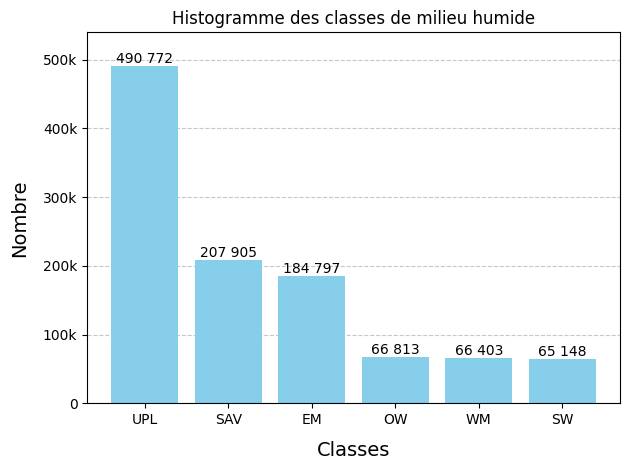

In [4]:
# Génération d'un histogramme du nombre d'observations par classe ('CLASSIF').

import matplotlib.ticker as ticker

counts = df.CLASSIF.value_counts()

fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, color='skyblue')
ax.set_xlabel('Classes', fontsize=14, labelpad=10)
ax.set_ylabel('Nombre', fontsize=14, labelpad=10)
ax.set_title("Histogramme des classes de milieu humide")
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(
        lambda x, _: f'{x/1000:0.0f}k' if x >= 1000 else int(x)
        ))

# Ajout padding vertical (10 % au-dessus du max).
ax.set_ylim(top=counts.max() * 1.1)

# Ajout de la valeur au dessus de chaque barre.
for bar in bars:
    count = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1,
            f"{count:,}".replace(",", " "),
            ha='center', va='bottom', fontsize=10)

fig.tight_layout()

## 4. Gestion des données manquantes

### 4.1. Quantification et visualisation des données manquantes

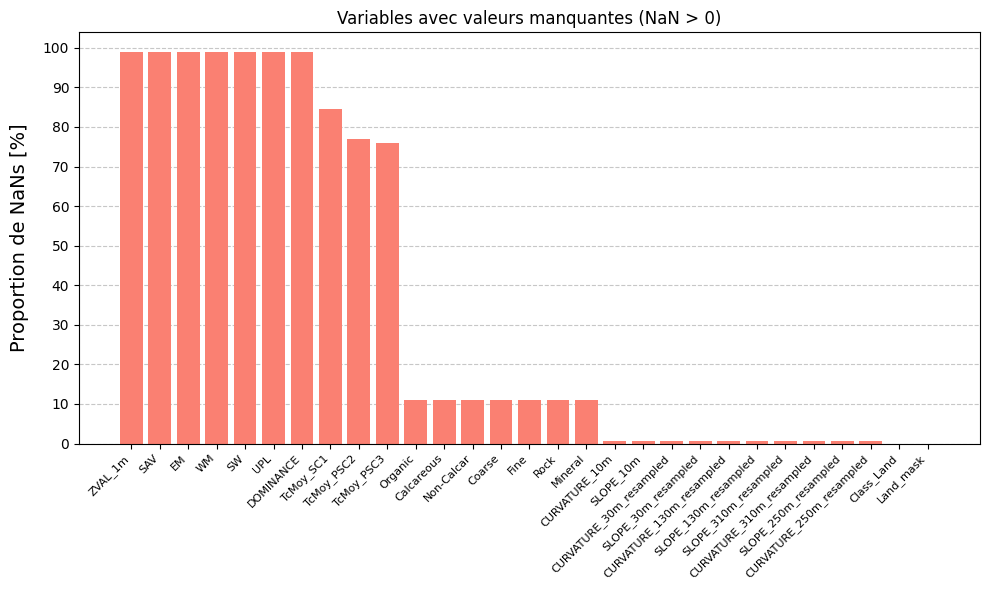

In [5]:
# Génération d'un histogramme

# Quantification des données manquantes
nan_perc = df.isna().mean()

# N'inclure que les variables avec au moins une valeur manquante.
nan_perc_filt = nan_perc[nan_perc > 0].sort_values(ascending=False)

# Afficher les résultats dans un graphique.
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    nan_perc_filt.index,
    nan_perc_filt.values * 100,
    color='salmon'
    )
ax.set_title('Variables avec valeurs manquantes (NaN > 0)')
ax.set_ylabel('Proportion de NaNs [%]', fontsize=14, labelpad=10)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.set_yticks(np.arange(0, 110, 10))
for label in ax.get_xticklabels():
    label.set_fontsize(8)
    label.set_rotation(45)
    label.set_ha('right')

fig.tight_layout()

### 4.2. Suppression des colonnes avec valeurs manquantes excessives

On élimine les colonnes avec un % de données manquantes supérieure à 30%.

In [6]:
cols_to_drop = nan_perc[nan_perc > 0.3].index.tolist()
df_cleaned = df.drop(columns=cols_to_drop)

print(
    f"Les {len(cols_to_drop)} colonnes suivantes ont été retirées du jeu "
    f"de données car elles contiennent plus de 30% de valeurs manquantes :\n"
    + "\n".join(f"   - {col} ({nan_perc[col] * 100:0.1f}%)" for
                col in cols_to_drop)
    )

Les 10 colonnes suivantes ont été retirées du jeu de données car elles contiennent plus de 30% de valeurs manquantes :
   - ZVAL_1m (99.0%)
   - SAV (99.0%)
   - EM (99.0%)
   - WM (99.0%)
   - SW (99.0%)
   - UPL (99.0%)
   - DOMINANCE (99.0%)
   - TcMoy_SC1 (84.6%)
   - TcMoy_PSC2 (77.1%)
   - TcMoy_PSC3 (76.0%)


### 4.3 Sélection des variables explicatives

On retire ici les colonnes pouvant biaiser la prédiction (ex: localisation,
identifiants) ainsi que la variable à prédire `CLASSIF` pour composer
les variables explicatives.

In [7]:
cols_to_drop = [
    'SAMPLE_ID', 'PT_ID', 'SITE_ID', 'TILE_ID', 'LON', 'LAT', 'XVAL',
    'YVAL', 'ZVAL', 'YEAR', 'SOURCE', 'SOURCE_TYPE', 'CLASSIF', 'UTM'
    ]
df_features = df_cleaned.drop(columns=cols_to_drop)

print(
    f"Les {len(cols_to_drop)} colonnes suivantes ont été retirées du jeu "
    f"de données car elles pourraient potentiellement biaiser le "
    f"modèle de prédiction :\n"
    + "\n".join(f"   - {col}" for col in cols_to_drop)
    )

Les 14 colonnes suivantes ont été retirées du jeu de données car elles pourraient potentiellement biaiser le modèle de prédiction :
   - SAMPLE_ID
   - PT_ID
   - SITE_ID
   - TILE_ID
   - LON
   - LAT
   - XVAL
   - YVAL
   - ZVAL
   - YEAR
   - SOURCE
   - SOURCE_TYPE
   - CLASSIF
   - UTM


### 4.3 Imputation des valeurs manquantes et encodage des variables catégorielles

Pour traiter les valeurs manquantes restantes dans le jeu de données, on
distingue deux approches :

1. Supprimer les lignes contenant des valeurs manquantes (perte d'information)

2. Imputer les valeurs manquantes, c'est-à-dire les remplacer par une valeur estimée

Dans cette la cellule ci-dessous, nous choisissons d'imputer les valeurs manquantes à l'aide de stratégies adaptées au type de variable. Nous utilisons pour cela la classe `ColumnTransformer`, qui permet d'appliquer sélectivement les bons traitements à chaque groupe de variables.

On distingue deux types de variables :

1. Pour les **variables numériques** : nous utilisons la méthode `SimpleImputer` de scikit-learn avec la stratégie de la moyenne, ce qui permet de remplacer chaque donnée manquante par la moyenne des valeurs observées dans la colonne concernée.

2. Pour les **variables catégorielles** : nous utilisons l'encodeur ordinal
 (`OrdinalEncoder`) de scikit-learn. Cette transformation attribue un code numérique unique à chaque modalité rencontrée dans une colonne catégorielle.<br>Attention : cette méthode n'est généralement adéquate que si l'ordre attribué n'a pas d'importance, ou pour des algorithmes supervisés au sens large. Les éventuelles valeurs manquantes dans les colonnes catégorielles seront considérées comme une nouvelle catégorie inconnue et codées en conséquence.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# On définit les colonnes qui sont des variables catégorielles et celles
# qui sont numériques.
cat_cols = [
    'Calcareous', 'Class_Land', 'Coarse', 'Fine',
    'HGM_BL', 'HGM_LOE', 'HGM_LPP', 'HGM_RRB', 'HGM_RRO',
    'Land_mask', 'Mineral', 'Non-Calcar', 'Organic', 'Rock'
    ]

num_cols = list(df_features.columns[~np.isin(df_features.columns, cat_cols)])

# Création du ColumnTransformer, où l'on associe des transformateurs
# spécifiques à des colonnes spécifiques.
preprocessor = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='mean'), num_cols),
        ('cat_imputer', OrdinalEncoder(), cat_cols)
        ],
    remainder='passthrough'  # 'passthrough' garde les colonnes non mentionnées
    )

# Application de la transformation pour imputer les valeurs manquantes.
# Le résultat est un tableau NumPy prêt à être utilisé pour l'entraînement
# d'un modèle..
arr_features = preprocessor.fit_transform(df_features)

## 5. Prédiction avec un modèle KNN (K Nearest neighbours)



In [ ]:
# The use of categorical variables with KnN model is not recommended, so it is
# better to drop them.
mask = np.isin(df_features.columns, num_cols)
arr_features_num = arr_features[:, mask]

In [ ]:
from sklearn.model_selection import train_test_split

# On cherche à classer la variable 'CLASSIF'
y = df['CLASSIF'].values
X = imputed_data

# Division : 70% train, 30% test
# stratify=y assure que la proportion des classes est conservée dans les deux sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

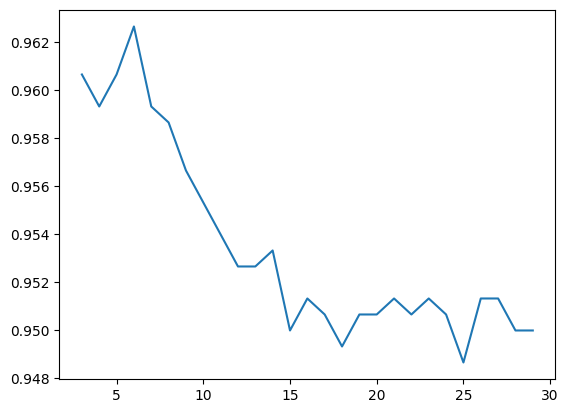

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Normalisation des données
ss = StandardScaler()

neighbours = np.arange(3, 30)
scores = []
for n in neighbours:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(ss.fit_transform(X_train), y_train)
  y_pred = knn.predict(ss.transform(X_test))
  scores.append(accuracy_score(y_test, y_pred, normalize = True))

plt.plot(neighbours, scores)

## 6. Prédiction avec un modèle Random Forest

In [ ]:

scaler = ColumnTransformer(
    transformers=[
        # (name, transformer, columns_to_apply_to)
        ('num_imputer', StandardScaler(), num_cols),
    ],
    # 'passthrough' keeps columns not mentioned; 'drop' (default) removes them
    remainder='passthrough'
)


In [ ]:
# On cherche à classer la variable 'CLASSIF' encore
y = df['CLASSIF'].values
X = df_imputed_array
# Division : 70% train, 30% test
# stratify=y assure que la proportion des classes est conservée dans les deux sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

X_train_std = scaler.fit_transform(pd.DataFrame(X_train, columns=num_cols + cat_cols))
X_test_std = scaler.transform(pd.DataFrame(X_test, columns=num_cols + cat_cols))

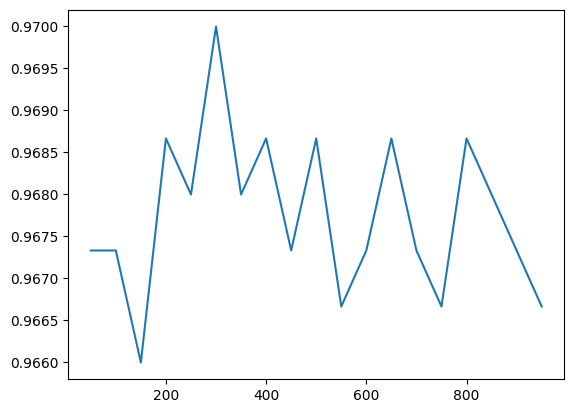

In [ ]:
from sklearn.ensemble import RandomForestClassifier

estimators = np.arange(50, 1000, 50)
scores = []
for n in estimators:
  clf = RandomForestClassifier(n_estimators=n)
  clf.fit(X_train_std, y_train)
  y_pred = clf.predict(X_test_std)
  scores.append(accuracy_score(y_test, y_pred, normalize = True))
plt.plot(estimators, scores)